# 6. 초기 탈모 예측


•지도 학습 분류 알고리즘 중 k-NN에 대해 이해한다

•다항 분류 딥러닝 모델을 제작한다.

•오차역전파법을 이해하고 딥러닝 가중치 갱신 과정을 파악한다.


##일상생활과 연관된 몇 가지 속성으로 탈모 정도를 분류하는 인공지능을 만들어 보자


- 2017년부터 2021년까지 5년 간 원형 탈모증 등 병적 탈모로 병,의원에서 진료를 받은 국민이 115만 명에 달하는 것으로 나타났다.
- 병적 탈모는 유전이나 노화로 인한 정상 탈모와 달리, 건강 악화나 약 부작용 등으로 인한 탈모를 말한다. 특히 화병, 우울증 같이 스트레스에서 비롯된 경우가 가장 많다


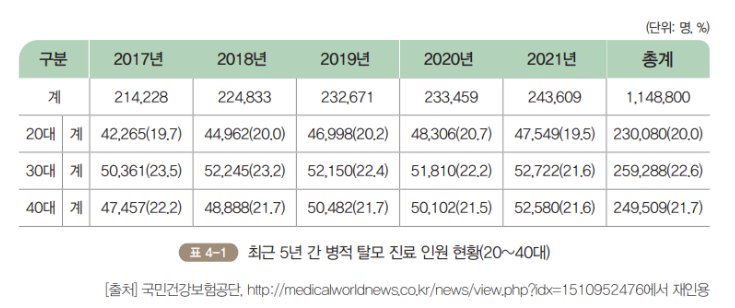

# [개념] k-NN이란?


k-NN: 분류하고자 하는 데이터와 가장 가까운 k개의 데이터를 찾아 다수의 클래스쪽으로 분류하는 알고리즘.

k의 값에 따라 데이터 분류가 달라지기에 상황에 맞는 k값 설정이 필요.

다양한 분야에 활용 가능하고 구현이 비교적 간단하여 머신러닝 초보자에게 인기 있는 알고리즘


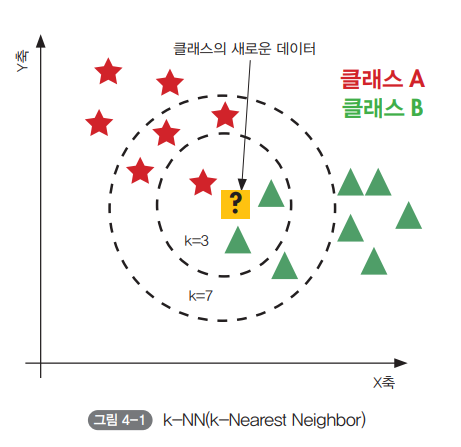

# [실습]

# 데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- 구글 다운로드 링크 혹은 삼양미디어 자료실에서 데이터를 다운 받을 수 있다.
- 탈모 데이터를 읽고 상위 5개 데이터를 확인한다.

In [ ]:
url = 'https://drive.google.com/uc?export=download&id=1YZH5iPMvC__xzyw4CGDBknOkaZhWAJDJ'
#dandruff 속성의 'None'값을 NaN(결측치)로 변환하는 것을 막기 위해 na_filter를 쓴다.
df = pd.read_excel(url, na_filter=False)
df.______

hair_loss  stay_up_late pressure_level  coffee_consumed  \
0       Few             2            Low                0   
1       Few             0            Low                0   
2    Medium             3            Low                1   
3       Few             2            Low                0   
4       Few             2            Low                0   

   brain_working_duration stress_level swimming hair_washing dandruff  
0                       1          Low       No            Y     None  
1                       3          Low       No            N     None  
2                       0          Low      Yes            Y     None  
3                       1          Low       No            N     None  
4                       1          Low       No            Y     None

**400명의 탈모 관련 정보**

머리숱, 두피압, 커피 섭취량, 스트레스 정도, 수영 여부 등등 정보가 있음.

**value_count()** : 속성별 개수 출력
- 머리숱 정도 : Few, Medium, Many, A lot
- 두피압, 스트레스 : Low, Medium, High, Very High
-일일 수영 여부, 머리 감기 여부 : Y, N
- 비듬 정도 : None, Few, Many





In [ ]:
print(df["hair_loss"].value_counts( ))
print(df["pressure_level"].value_counts( ))
print(df["stress_level"].value_counts( ))
print(df["swimming"].value_counts( ))
print(df["hair_washing"].value_counts( ))
print(df["dandruff"].value_counts( ))

Few       169
Medium    167
Many       42
A lot      22
Name: hair_loss, dtype: int64
Low          275
Medium        57
High          45
Very High     23
Name: pressure_level, dtype: int64
Low          261
Medium        56
High          45
Very High     38
Name: stress_level, dtype: int64
No     307
Yes     93
Name: swimming, dtype: int64
N    209
Y    191
Name: hair_washing, dtype: int64
None    289
Few      76
Many     35
Name: dandruff, dtype: int64


모두 값이 있고 결측치 처리가 필요 없음을 알 수 있음.

In [ ]:
df._______.sum( )

hair_loss                 0
stay_up_late              0
pressure_level            0
coffee_consumed           0
brain_working_duration    0
stress_level              0
swimming                  0
hair_washing              0
dandruff                  0
dtype: int64

- 문자로 이루어진 데이터를 숫자로 라벨링한다.
- replace() 함수로 각 문자를 0, 1, 2의 숫자로 대체한다.
- 비듬 정도, 머리숱, 수영 여부, 머리 감기 여부 : 숫자 라벨링
- 남은 두피압과 스트레스 정도는 한 번에 라벨링







In [ ]:
df['dandruff'].replace('None',0,inplace = True)
df['dandruff'].replace('Few',1,inplace = True)
df['dandruff'].replace('Many',2, inplace = True)
df['hair_loss'].replace("Few", 0, inplace = True)
df['hair_loss'].replace("Medium", 1, inplace = True)
df['hair_loss'].replace("Many", 2, inplace = True)
df['hair_loss'].replace("A lot", 3, inplace = True)
df['swimming'].replace('Yes', 1, inplace = True)
df['swimming'].replace('No', 0, inplace = True)
df['hair_washing'].replace('Y', 1, inplace = True)
df['hair_washing'].replace('N', 0, inplace = True)
df.replace('Low', 0, inplace = True)
df.replace('Medium', 1, inplace = True)
df.replace('High', 2, inplace = True)
df.replace('Very High', 3, inplace = True)
df.head( )

hair_loss  stay_up_late  pressure_level  coffee_consumed  \
0          0             2               0                0   
1          0             0               0                0   
2          1             3               0                1   
3          0             2               0                0   
4          0             2               0                0   

   brain_working_duration  stress_level  swimming  hair_washing  dandruff  
0                       1             0         0             1         0  
1                       3             0         0             0         0  
2                       0             0         1             1         0  
3                       1             0         0             0         0  
4                       1             0         0             1         0

In [ ]:
X_df = ____________
X_df.head( )

stay_up_late  pressure_level  coffee_consumed  brain_working_duration  \
0             2               0                0                       1   
1             0               0                0                       3   
2             3               0                1                       0   
3             2               0                0                       1   
4             2               0                0                       1   

   stress_level  swimming  hair_washing  dandruff  
0             0         0             1         0  
1             0         0             0         0  
2             0         1             1         0  
3             0         0             0         0  
4             0         0             1         0

- 라벨링을 마친 데이터를 종속 변수와 독립 변수로 분리
- 머리 숱(hair_loss)을 Y_data에, 나머지를 X_data에 담는다.


In [ ]:
X_data = X_df.to_numpy( )
X_data._____

(400, 8)

In [ ]:
Y_data = ________________________
Y_data._____

(400,)

- 분리된 데이터를 훈련 데이터와 테스트 데이터로 나눠 준다.
- 데이터 양이 많지 않으므로 테스트 데이터를 5% 실행

- X_train : 380명의 8개 속성 데이터
- X_test : 20명의 8개 속성 데이터
- Y_train : 280명의 탈모 정도
- Y_test : 20명의 탈모 정도


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.05, random_state = 42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((380, 8), (20, 8), (380,), (20,))

# k-NN 모델 학습하기

- k-NN 알고리즘인 KNeighborsClassifier 호출하고 모델을 불러옴.
- **n_neighbors** : k 값







In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = _____________________________________

In [ ]:
#knn 모델 학습
knn_model.____________________

KNeighborsClassifier(n_neighbors=3)

score() 함수로 학습 데이터의 정확도 확인하니 93.6%가 나옴
score() 함수로 테스트 데이터로 평가한 결과 80%라는 다소 낮은 정확도가 나옴






In [ ]:
knn_model.______(X_train, Y_train)

0.9368421052631579

In [ ]:
knn_model.______(X_test, Y_test)

0.8

k값에 따라 어떻게 정확도가 바뀌는지 확인해보자

- k_list 변수에 1~50 저장
- 훈련 데이터, 테스트 데이터의 정확도를 저장하기 위해 acc_train, acc_test 생성

- 반복문을 이용해 k-NN모델 선언
- 훈련 데이터로 학습 후 훈련 데이터 정확도와 테스트 데이터 정확도를 각각 저장함

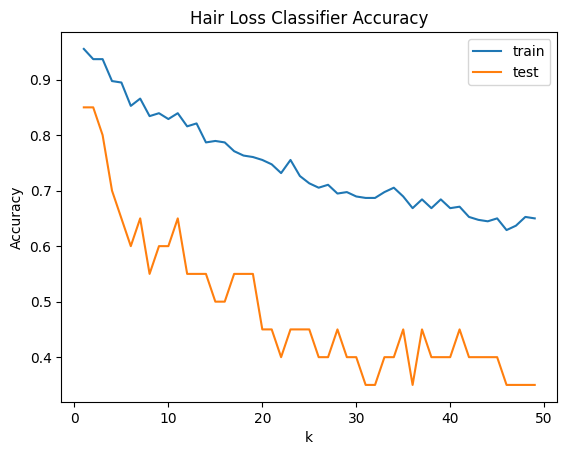

In [ ]:
k_list = range(1,50)
acc_train = [ ]
acc_test = [ ]
for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(X_train, Y_train)
  acc_train.append(classifier.score(X_train, Y_train))
  acc_test.append(classifier.score(X_test, Y_test))
plt.plot(____________________________________)
plt.plot(______________________________)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Hair Loss Classifier Accuracy")
plt.legend( )
plt.show( )

- k 값이 커질수록 정확도가 낮아짐
- 실제  활용을 위해서는 테스트 데이터의 정확도가 중요
- 정확도는 최대 85%정도로 나타남









**k-NN 모델 혼동 행렬**
- 정확도 80%, 탈모 정도별 정밀도가 전체적으로 낮은 것을 알 수 있음.

- 탈모 데이터를 k-NN으로 학습하였으나 잘 맞지 않다고 볼 수 있음.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
knn_prediction = __________________
print('혼동 행렬\n', confusion_matrix(Y_test, knn_prediction))
print('\n평가 지표\n', classification_report(Y_test, knn_prediction, zero_division = 0))

혼동 행렬
 [[ 4  1  0  0]
 [ 2 10  0  0]
 [ 0  0  2  0]
 [ 0  0  1  0]]

평가 지표
               precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.91      0.83      0.87        12
           2       0.67      1.00      0.80         2
           3       0.00      0.00      0.00         1

    accuracy                           0.80        20
   macro avg       0.56      0.66      0.60        20
weighted avg       0.78      0.80      0.78        20





---



# 다항 분류 딥러닝 모델 학습하기

- k-NN은 예상보자 높지 않은 정확도가 나왔으므로 다항 분류 딥러닝 모델로 학습해보자.
- 탈모 정도를 네 가지로 나누어 벡터값을 담는다
- 원-핫 인코딩을 해 주어 네 가지 벡터값을 담을 수 있는 리스트로 Y_data를 변환
- 이미지 개수가 많을 때 batch_size가 작으면 학습 시간이 매우 길어진다



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#원-핫 인코딩
from keras.utils import to_categorical
Y_encoded = __________________
Y = __________________
Y[0]

array([1., 0., 0., 0.], dtype=float32)

- 테스트 데이터의 비율 5%로 하여 훈련 데이터와 테스트 데이터로 나눠줌.
- 입력층, 은닉층 2개, 출력층으로 딥러닝 모델 구성

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y, test_size = 0.05, random_state = 42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((380, 8), (20, 8), (380, 4), (20, 4))

In [ ]:
tf.random.set_seed(3)
model = Sequential( )
model.add(Dense(72,  input_dim = 8, activation = 'relu'))
model.add(Dense(36, activation = 'relu'))
model.add(Dense(12,  activation = 'relu'))
model.add(Dense(______________________))  #출력층 인공신경세포 수 = 탈모의 정도 카테고리 수 4개

# 탈모 분류 딥러닝 모델 학습 및 평가

**loss = categorical_crossentropy로 설정 후 컴파일**
- 오차 : 0.1051,  정확도 : 94.15%  ⇒  k-NN 모델보다 다소 높음

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.fit(_________________________________________________________________)

# epochs : 학습 횟수
# batch_size : 데이터 소그룹
# validation_split : 검증 데이터 비율 설정

Epoch 1/150
35/35 [==============================] - 1s 7ms/step - loss: 1.3700 - accuracy: 0.3713 - val_loss: 1.3267 - val_accuracy: 0.5526
Epoch 2/150
35/35 [==============================] - 0s 2ms/step - loss: 1.2104 - accuracy: 0.6140 - val_loss: 1.1669 - val_accuracy: 0.6316
Epoch 3/150
35/35 [==============================] - 0s 2ms/step - loss: 1.0106 - accuracy: 0.7368 - val_loss: 0.9127 - val_accuracy: 0.6842
Epoch 4/150
35/35 [==============================] - 0s 2ms/step - loss: 0.8183 - accuracy: 0.7602 - val_loss: 0.6843 - val_accuracy: 0.7368
Epoch 5/150
35/35 [==============================] - 0s 2ms/step - loss: 0.6590 - accuracy: 0.7719 - val_loss: 0.6466 - val_accuracy: 0.7895
Epoch 6/150
35/35 [==============================] - 0s 2ms/step - loss: 0.6077 - accuracy: 0.7690 - val_loss: 0.5143 - val_accuracy: 0.7632
Epoch 7/150
35/35 [==============================] - 0s 2ms/step - loss: 0.5430 - accuracy: 0.8012 - val_loss: 0.4496 - val_accuracy: 0.8421
Epoch 8/150
3

**evaluate() 함수로 테스트 데이터 예측한 결과**
- 오차 : 0.25,  정확도 : 95%  ⇒  k-NN의 테스트 데이터 정확도보다 훨씬 높음


In [ ]:
model.__________________

1/1 [==============================] - 0s 28ms/step - loss: 0.2776 - accuracy: 0.9500


[0.2776331305503845, 0.949999988079071]